Name  Fahmida

Labpartner(s)

In [ ]:
#import statements go here


# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$ (i.e.,grazing term)

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

Note to Keep 
Population growth , dp/dt = (b-d)p
Exponential growth 

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [3]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [4]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [5]:
#Now solve the system 
# set time-increment and discretize the time
T  = 15.0                           # final time in years 
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [6]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [7]:
n=0
u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [8]:
u_euler

array([[10.  ,  2.  ],
       [ 9.86,  2.12],
       [ 0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [9]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [10]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [11]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

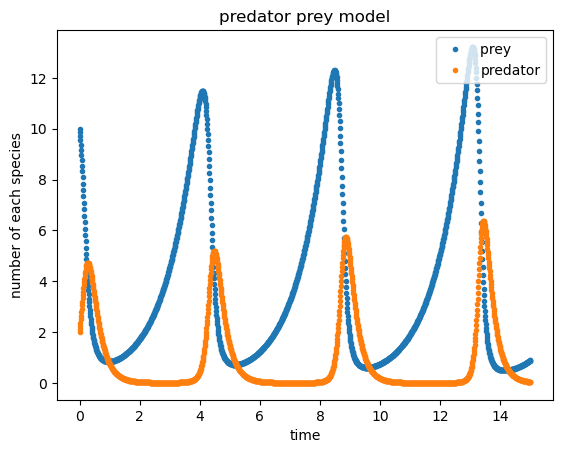

In [12]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Let's think a bit about what this solution means, what is going on here?

Initially there were lots of prey and the number of preditor were less. At that time the prediros were eating the prey and the number of prey will decrese and the number of preditor will increase. 

What happens if we start with different initial conditions? Like more prey and less predators.

In [13]:
#Now solve the system 
# set time-increment and discretize the time
T  = 15.0                           # final time in years 
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations): changing this 
x0 = 15. # initial prey amount
y0 = 0. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [14]:
u_euler

array([[15.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [15]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [16]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

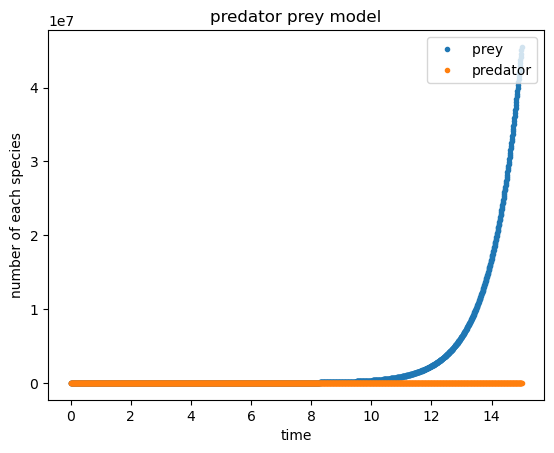

In [17]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

The prey increases drastically, there is no more predator to eat them. 

What if we start with the same amount of prey and predators?

In [18]:
#Now solve the system 
# set time-increment and discretize the time
T  = 15.0                           # final time in years 
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations): changing this 
x0 = 15. # initial prey amount
y0 = 15. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [19]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [20]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

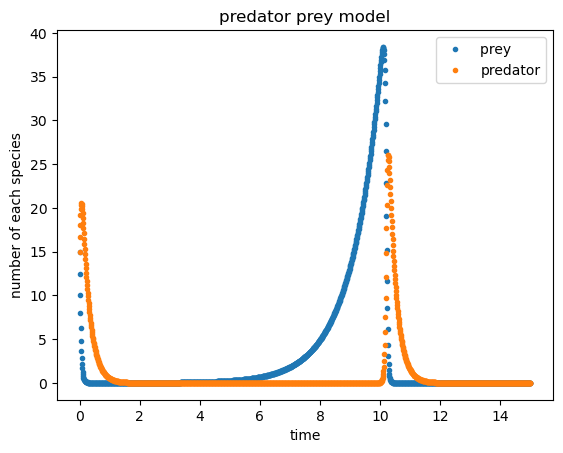

In [21]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

It is a similar cycle than before but slower cycles.

Let's mess around with the model parameters. What if the prey grow faster?

In [22]:
# set the parameters
alpha = 10.
beta = 1.2
gamma = 4.
delta = 1.

In [23]:
#Now solve the system 
# set time-increment and discretize the time
T  = 15.0                           # final time in years 
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [24]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [25]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [26]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

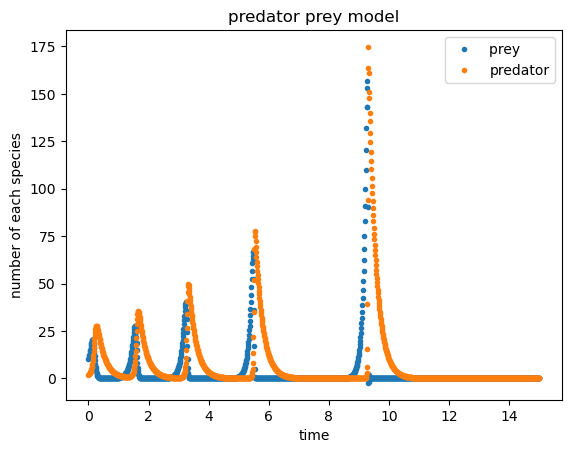

In [27]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

The y axis changed when increasing the growth rate of the prey by 10. The growth rate of the prey affected the cycle.

In [28]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [29]:
#Now solve the system 
# set time-increment and discretize the time
T  = 15.0                           # final time in years 
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [30]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [31]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

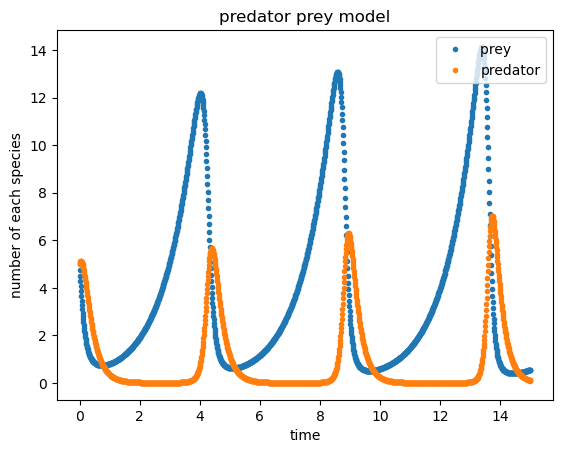

In [32]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

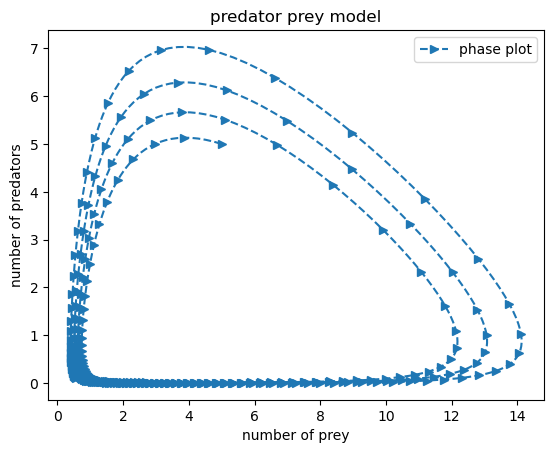

In [33]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

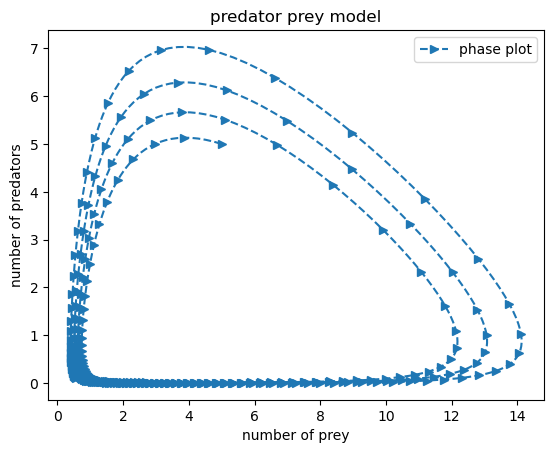

In [34]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

Text(0.5, 1.0, 'predator prey model')

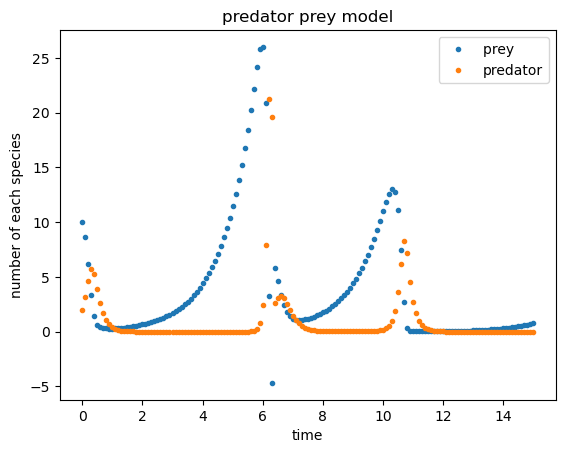

In [35]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Now solve the sustem



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

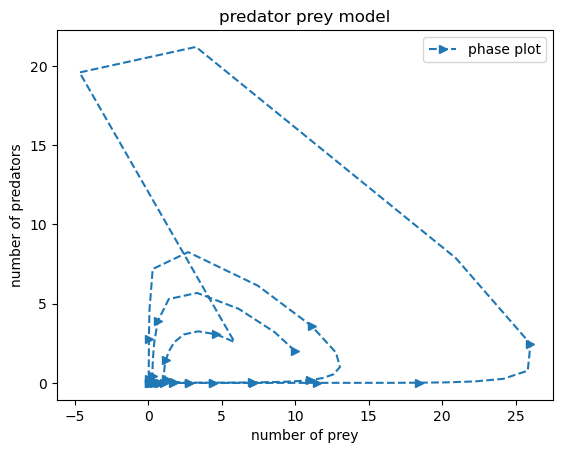

In [36]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

The prey (blue) population rapidly increases, reaching unrealistic values, and then abruptly drops below zero (biologically impossible). This is a sign of numerical instability. The predator (orange) population similarly oscillates unpredictably and sometimes dips below zero, which also makes no sense biologically.

Text(0.5, 1.0, 'predator prey model')

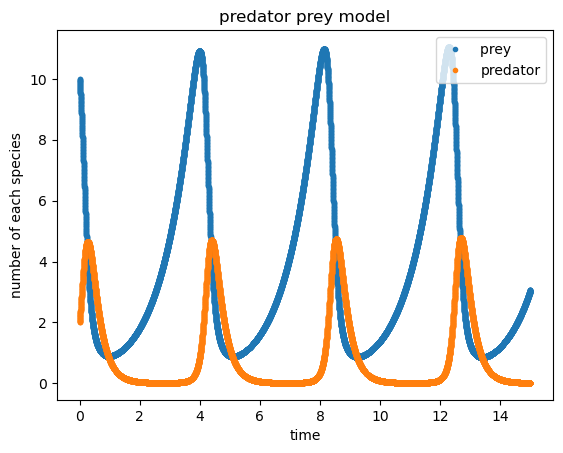

In [37]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Now solve the sustem



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

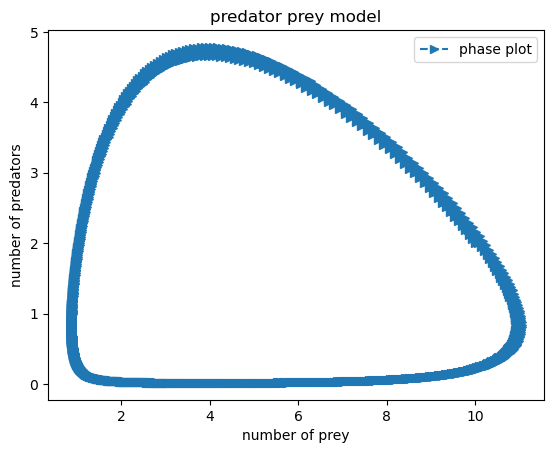

In [38]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Prior to the predator population (orange), the prey population (blue) rises. Because predators require time to eat prey and procreate, their development is predicted to lag behind that of prey.The Lotka-Volterra model's smooth, periodic oscillations are now evident in the prey (blue) and predator (orange) populations.
The natural dynamics of predator-prey interactions are reflected in these oscillations, whereby the prey population increases, predator populations decrease, and predator populations diminish.

Text(0.5, 1.0, 'predator prey model')

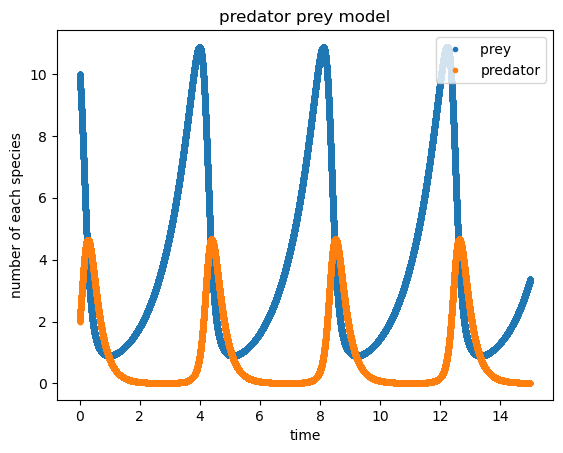

In [39]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Now solve the sustem



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.0001                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

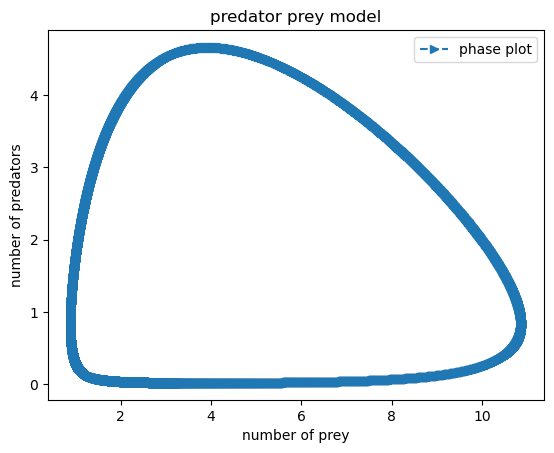

In [40]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

There are now no discernible numerical artifacts in the oscillations of the prey (blue) and predator (orange) populations, which are very smooth.
The solution closely follows the Lotka-Volterra equations' theoretical dynamics.

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



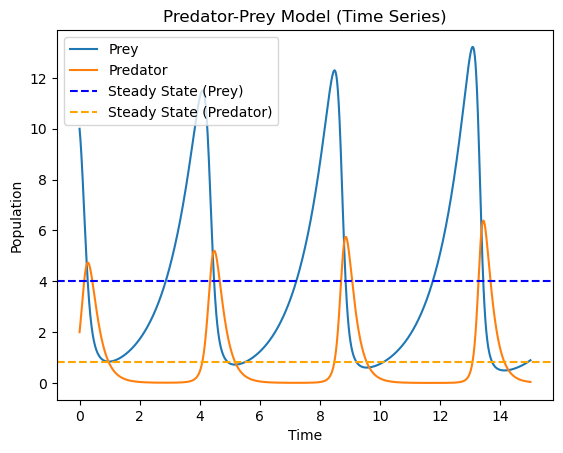

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Steady state
x_star = gamma / delta
y_star = alpha / beta

# Define the system of equations
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Euler step
def euler_step(u, f, dt, t=0):
    return u + dt * f(u, t)

# Simulation parameters
T = 15.0
dt = 0.01
N = int(T / dt) + 1

# Initial conditions (near the steady state)
x0 = 10  # Slightly above the steady state
y0 = 2  # Slightly above the steady state
u0 = np.array([x0, y0])

# Time array and solution array
time = np.linspace(0, T, N)
u_euler = np.zeros((N, 2))
u_euler[0] = u0

# Time stepping
for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

# Extract prey and predator populations
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

# Plot time series

plt.plot(time, x_euler, label='Prey')
plt.plot(time, y_euler, label='Predator')
plt.axhline(x_star, color='blue', linestyle='--', label='Steady State (Prey)')
plt.axhline(y_star, color='orange', linestyle='--', label='Steady State (Predator)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model (Time Series)')
plt.legend()

plt.show()

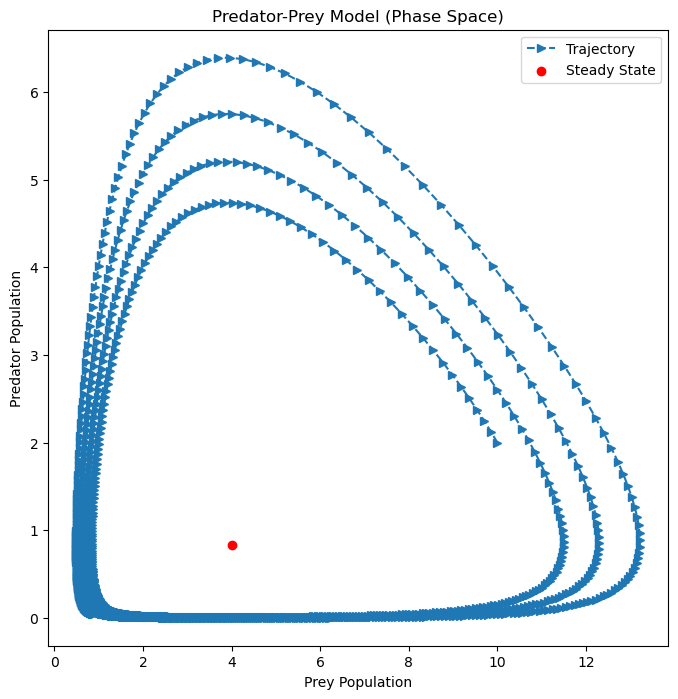

In [42]:
# Phase space plot
plt.figure(figsize=(8, 8))
plt.plot(x_euler, y_euler,'-->', label='Trajectory')
plt.scatter(x_star, y_star, color='red', label='Steady State', zorder=5)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Predator-Prey Model (Phase Space)')
plt.legend()

plt.show()

Horizontal dashed lines indicate the steady-state populations. When the system starts close to this fixed point, the populations initially oscillate around it but gradually settle due to the small perturbation applied.

Fixed Point in Phase Space:

The fixed point is shown as a red dot. If the system starts near this point, the trajectories spiral inward or oscillate around it, eventually converging to the fixed point.

Behavior When Starting at Steady State:

When the initial condition is exactly at the fixed point, the system remains there indefinitely since no population changes occur.

Text(0.5, 1.0, 'predator prey model')

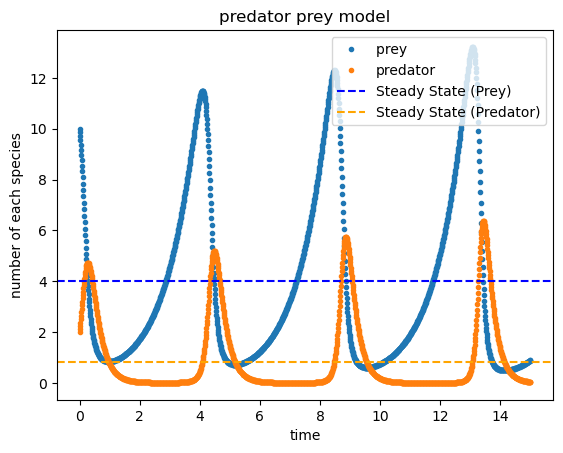

In [43]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Steady state
x_star = gamma / delta
y_star = alpha / beta


# Now solve the sustem
# Define the system of equations
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Euler step
def euler_step(u, f, dt, t=0):
    return u + dt * f(u, t)



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10 # initial prey amount
y0 = 2 # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.axhline(x_star, color='blue', linestyle='--', label='Steady State (Prey)')
plt.axhline(y_star, color='orange', linestyle='--', label='Steady State (Predator)')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

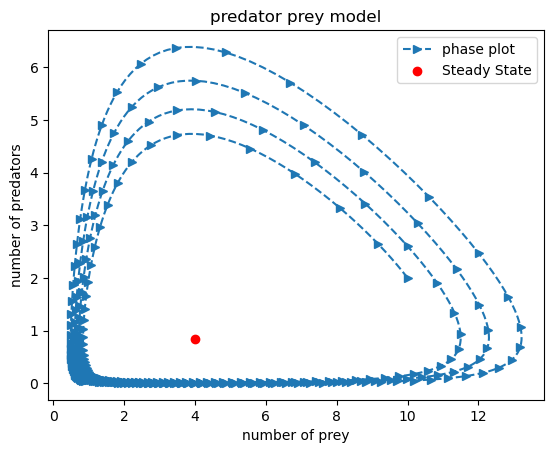

In [44]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.scatter(x_star, y_star, color='red', label='Steady State', zorder=5)
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Fixed Point in Time Series:

At the steady state, the predator and prey populations are 4 and 0.83, respectively. These steady-state values are shown as horizontal dashed lines. If the system begins close to this fixed point, the populations initially oscillate around it but eventually stabilize due to the applied small perturbation.

Fixed Point in Phase Space:

The fixed point is represented by a red dot. When starting near this point, trajectories spiral inward or oscillate around it, ultimately converging to the fixed point.

Behavior When Starting at the Steady State:

If the initial condition is precisely at the fixed point, the system will remain there indefinitely, as the population levels do not change.

Text(0.5, 1.0, 'predator prey model')

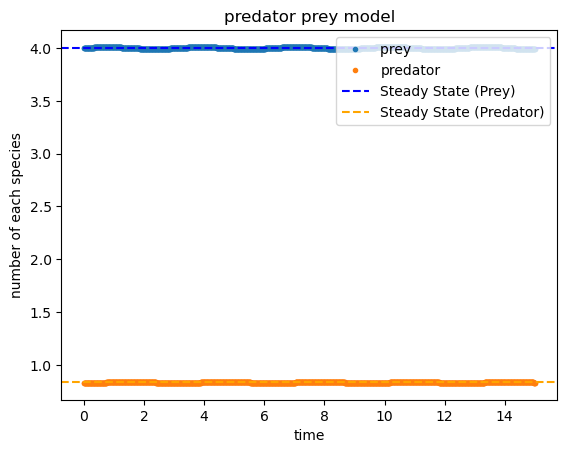

In [45]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Steady state
x_star = gamma / delta
y_star = alpha / beta


# Now solve the sustem
# Define the system of equations
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Euler step
def euler_step(u, f, dt, t=0):
    return u + dt * f(u, t)



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 4.0 # initial prey amount
y0 = 0.83 # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.axhline(x_star, color='blue', linestyle='--', label='Steady State (Prey)')
plt.axhline(y_star, color='orange', linestyle='--', label='Steady State (Predator)')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

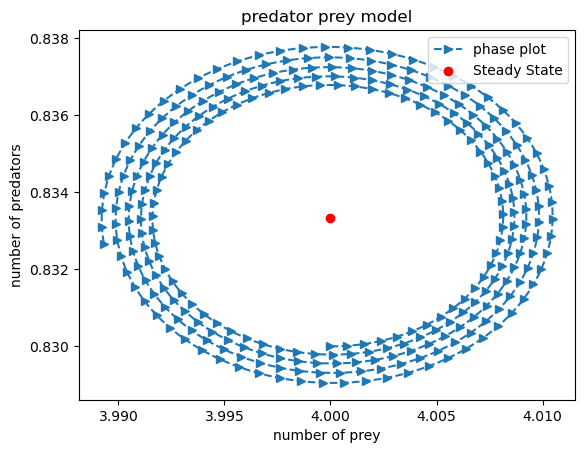

In [46]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.scatter(x_star, y_star, color='red', label='Steady State', zorder=5)
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [47]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [ ]:
by making it 10 times bigger

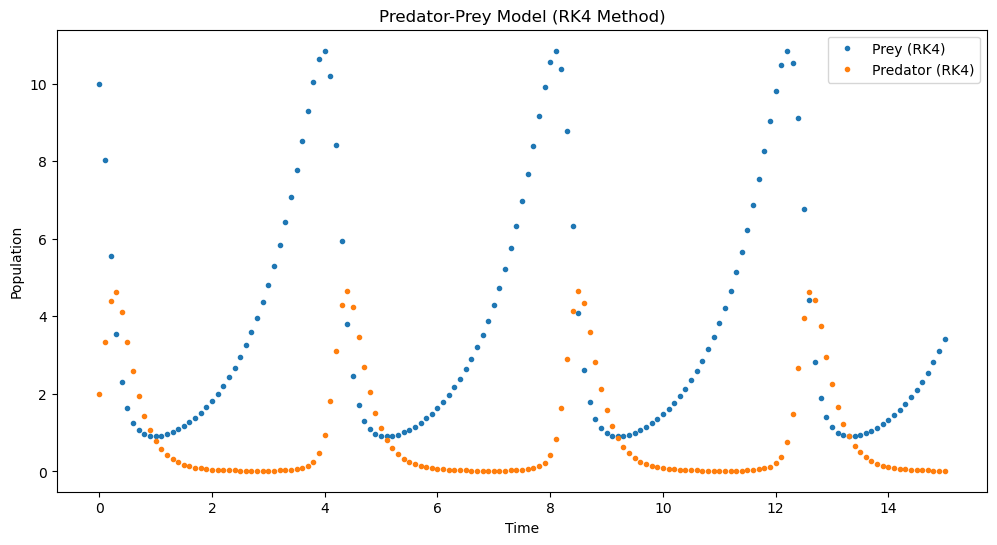

In [48]:
# Define parameters
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Predator-prey system of equations (Lotka-Volterra model)
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Runge-Kutta 4th order method (RK4)
def RK4(u, f, t, dt):
    k1 = f(u, t)
    k2 = f(u + 0.5*dt*k1, t + 0.5*dt)
    k3 = f(u + 0.5*dt*k2, t + 0.5*dt)
    k4 = f(u + dt*k3, t + dt)
    return u + (dt/6.)*(k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
T = 15.0  # Final time
dt = 0.1  # Time increment
N = int(T / dt) + 1  # Number of time steps

# Initial conditions
x0 = 10.0  # Initial prey population
y0 = 2.0   # Initial predator population
u0 = np.array([x0, y0])

# Time array and solution array
time = np.linspace(0, T, N)
u_rk4 = np.zeros((N, 2))
u_rk4[0] = u0

# Time stepping using RK4
for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, time[n], dt)

# Break up the solutions for plotting
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(time, x_rk4, '.', label='Prey (RK4)')
plt.plot(time, y_rk4, '.', label='Predator (RK4)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model (RK4 Method)')
plt.legend()

plt.show()


Text(0.5, 1.0, 'predator prey model')

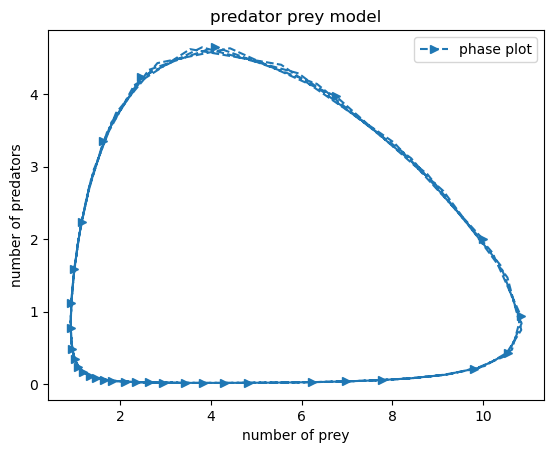

In [49]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

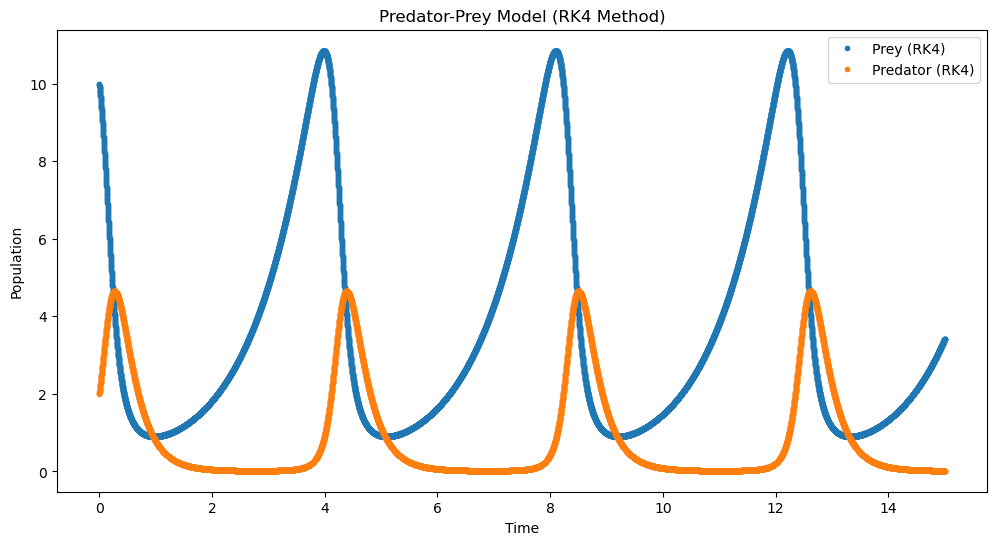

In [51]:
#by making it 10 times smaller 

# Define parameters
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Predator-prey system of equations (Lotka-Volterra model)
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Runge-Kutta 4th order method (RK4)
def RK4(u, f, t, dt):
    k1 = f(u, t)
    k2 = f(u + 0.5*dt*k1, t + 0.5*dt)
    k3 = f(u + 0.5*dt*k2, t + 0.5*dt)
    k4 = f(u + dt*k3, t + dt)
    return u + (dt/6.)*(k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
T = 15.0  # Final time
dt = 0.001  # Time increment
N = int(T / dt) + 1  # Number of time steps

# Initial conditions
x0 = 10.0  # Initial prey population
y0 = 2.0   # Initial predator population
u0 = np.array([x0, y0])

# Time array and solution array
time = np.linspace(0, T, N)
u_rk4 = np.zeros((N, 2))
u_rk4[0] = u0

# Time stepping using RK4
for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, time[n], dt)

# Break up the solutions for plotting
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(time, x_rk4, '.', label='Prey (RK4)')
plt.plot(time, y_rk4, '.', label='Predator (RK4)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model (RK4 Method)')
plt.legend()

plt.show()


Text(0.5, 1.0, 'predator prey model')

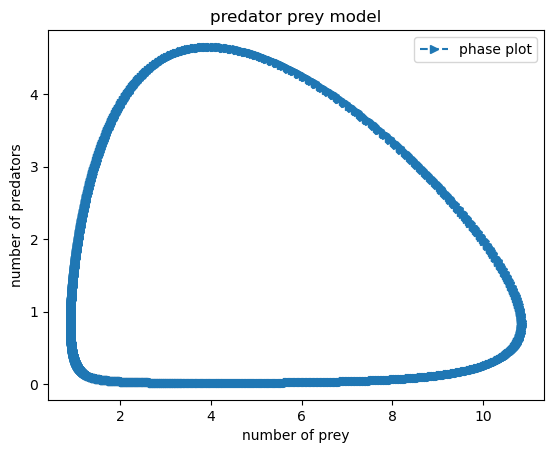

In [52]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

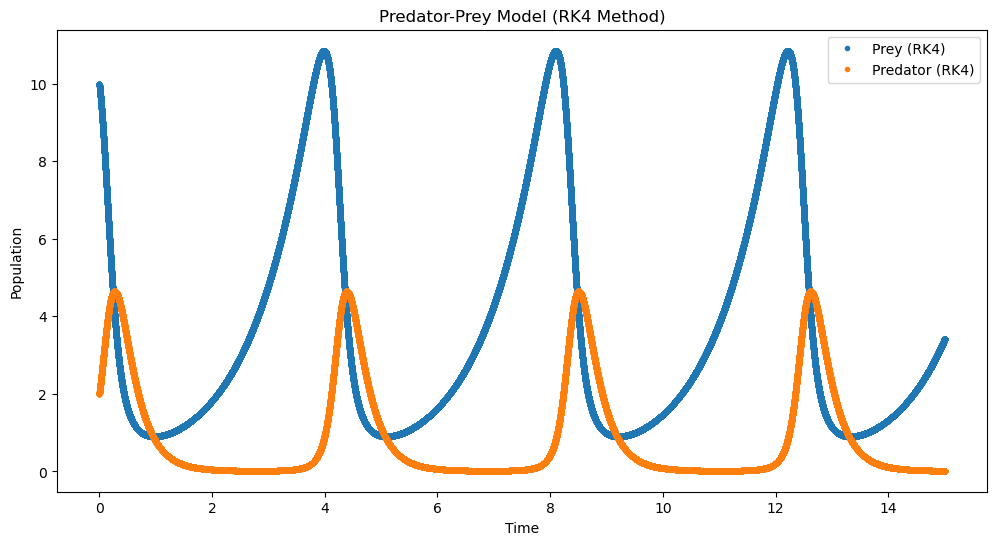

In [53]:
#By making it 100 times smaller 

# Define parameters
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Predator-prey system of equations (Lotka-Volterra model)
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Runge-Kutta 4th order method (RK4)
def RK4(u, f, t, dt):
    k1 = f(u, t)
    k2 = f(u + 0.5*dt*k1, t + 0.5*dt)
    k3 = f(u + 0.5*dt*k2, t + 0.5*dt)
    k4 = f(u + dt*k3, t + dt)
    return u + (dt/6.)*(k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
T = 15.0  # Final time
dt = 0.0001  # Time increment
N = int(T / dt) + 1  # Number of time steps

# Initial conditions
x0 = 10.0  # Initial prey population
y0 = 2.0   # Initial predator population
u0 = np.array([x0, y0])

# Time array and solution array
time = np.linspace(0, T, N)
u_rk4 = np.zeros((N, 2))
u_rk4[0] = u0

# Time stepping using RK4
for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, time[n], dt)

# Break up the solutions for plotting
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(time, x_rk4, '.', label='Prey (RK4)')
plt.plot(time, y_rk4, '.', label='Predator (RK4)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Model (RK4 Method)')
plt.legend()

plt.show()

Text(0.5, 1.0, 'predator prey model')

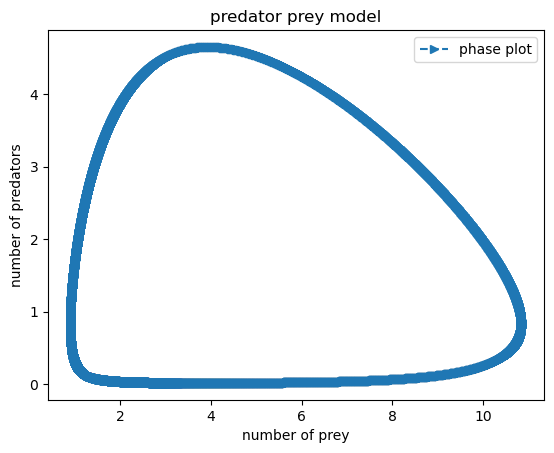

In [54]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

K4 (Runge-Kutta 4th Order): This method delivers smoother and more precise results, effectively capturing the periodic behavior of predator-prey dynamics without significant distortions or numerical instability. The oscillations remain consistent and closely match the theoretical predator-prey cycles.

Euler Method: Although it replicates the general periodic pattern, transitions between peaks and troughs may be less smooth due to cumulative numerical errors. Over time, the oscillations might drift or display slight inaccuracies in amplitude and cycle duration.

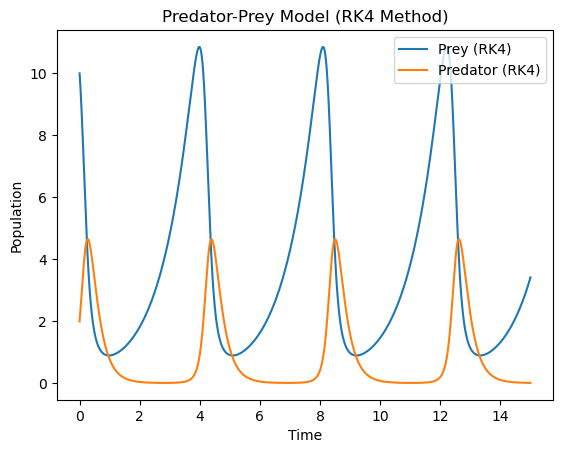

In [55]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Lotka-Volterra model
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Define the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species."""
    x = u[0]  # Prey population
    y = u[1]  # Predator population
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

# Runge-Kutta 4th order method
def RK4(u, f, dt):
    """Returns the solution at the next time-step using RK4."""
    k1 = f(u)
    u1 = u + (dt / 2.0) * k1
    k2 = f(u1)
    u2 = u + (dt / 2.0) * k2
    k3 = f(u2)
    u3 = u + dt * k3
    k4 = f(u3)
    return u + (dt / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

# Simulation parameters
T = 15.0                           # Final time
dt = 0.0001                        # Time increment
N = int(T / dt) + 1                # Number of time steps

# Initial conditions
x0 = 10.0                          # Initial prey population
y0 = 2.0                           # Initial predator population
u_rk4 = np.zeros((N, 2))           # Initialize the solution array
u_rk4[0] = np.array([x0, y0])      # Set initial conditions

# Time integration using RK4
for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

# Extract populations for plotting
time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

# Plot the results

plt.plot(time, x_rk4, '-', label='Prey (RK4)')
plt.plot(time, y_rk4, '-', label='Predator (RK4)')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model (RK4 Method)")

plt.show()

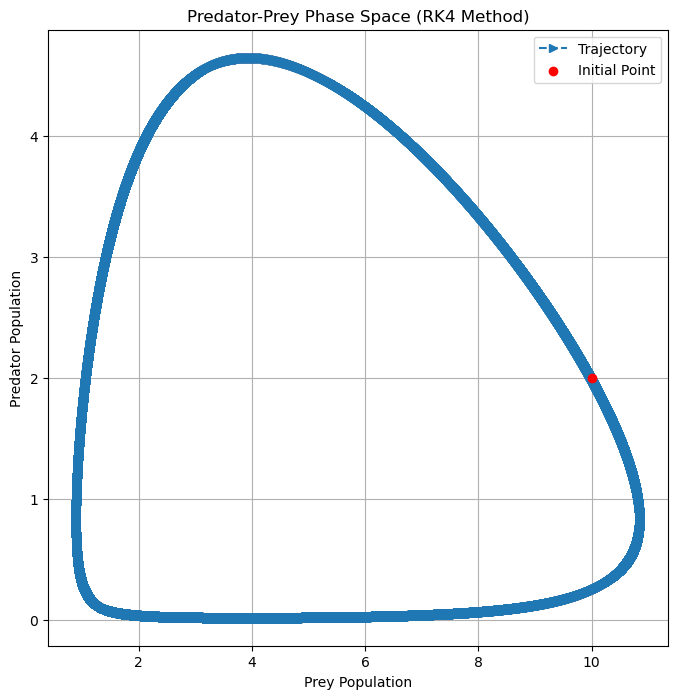

In [56]:
# Phase space plot
plt.figure(figsize=(8, 8))
plt.plot(x_rk4, y_rk4,'-->', label='Trajectory')
plt.scatter([x0], [y0], color='red', label='Initial Point', zorder=5)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Predator-Prey Phase Space (RK4 Method)')
plt.legend()
plt.grid()
plt.show()

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [ ]:
α (Prey birth rate):
Controls how quickly the prey population grows in the absence of predators.
Increasing 
Higher prey growth rate, leading to larger prey populations.
Decreasing 
Slower prey growth, potentially leading to extinction in extreme cases.
β (Predation rate):
Controls how efficiently predators consume prey.
Increasing 
Faster depletion of prey due to predation, potentially causing prey collapse.
Decreasing 
Reduced predation pressure, allowing prey populations to flourish.
γ (Predator death rate):
Controls how quickly predators die in the absence of prey.
Increasing 
Higher predator mortality, leading to predator population decline.
Decreasing 
Longer predator survival, which could sustain predator populations even at lower prey levels.
δ (Predator reproduction efficiency):
Controls how effectively predators reproduce based on prey consumption.
Increasing 
Faster predator population growth, potentially destabilizing the system.
Decreasing 
Slower predator reproduction, which may reduce predator numbers.

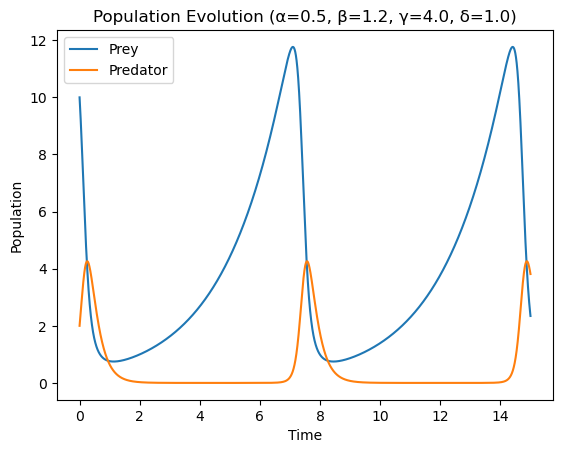

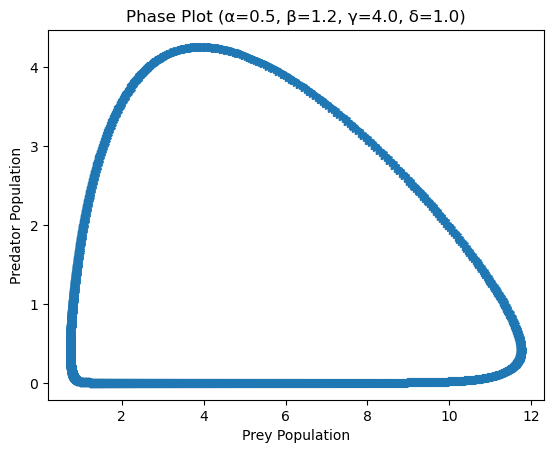

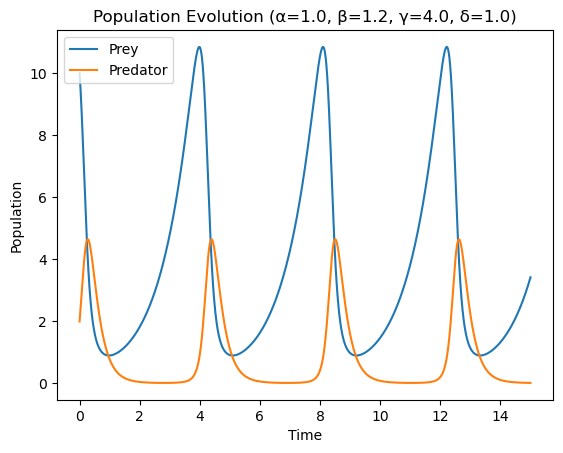

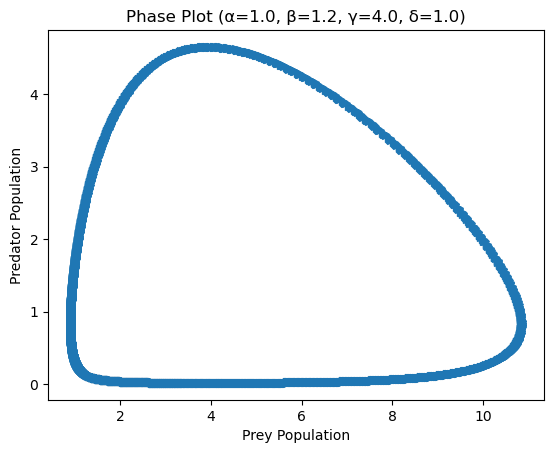

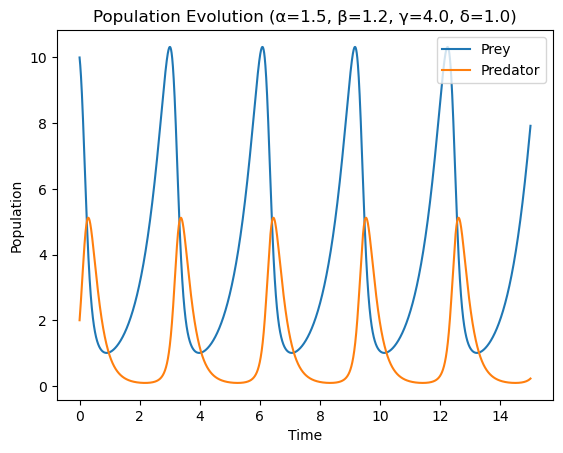

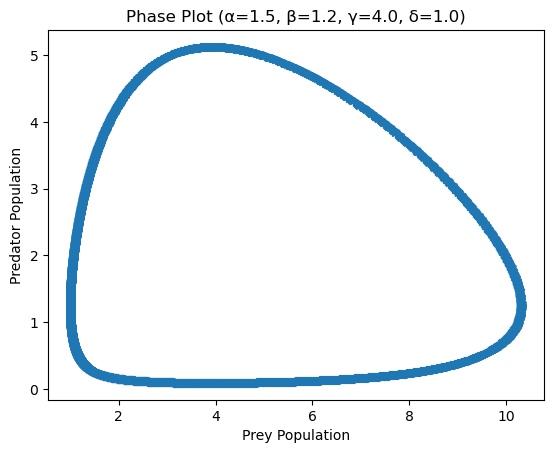

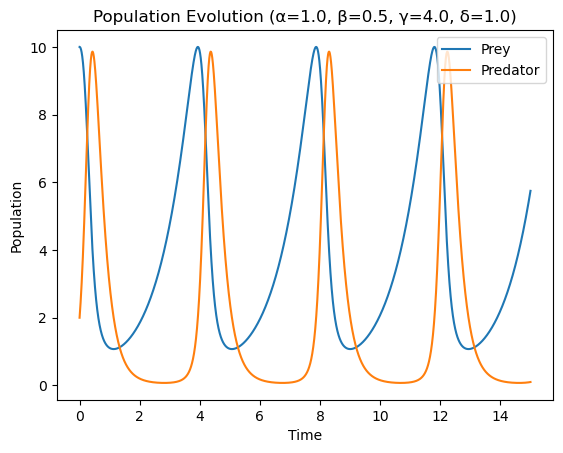

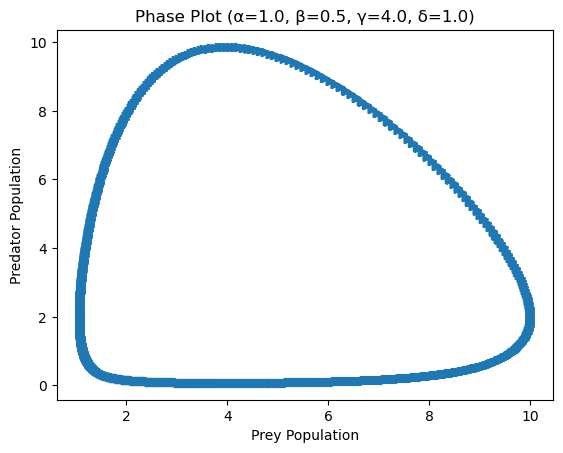

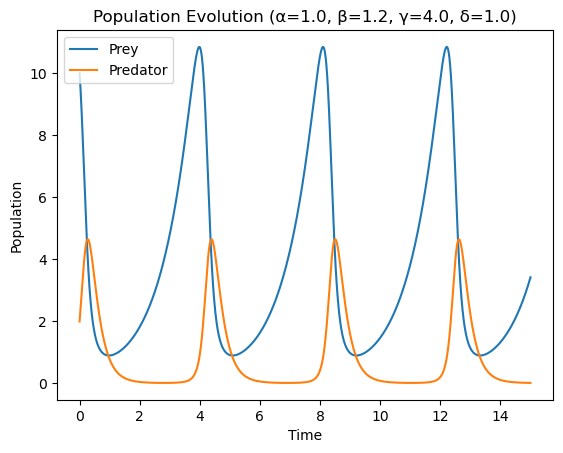

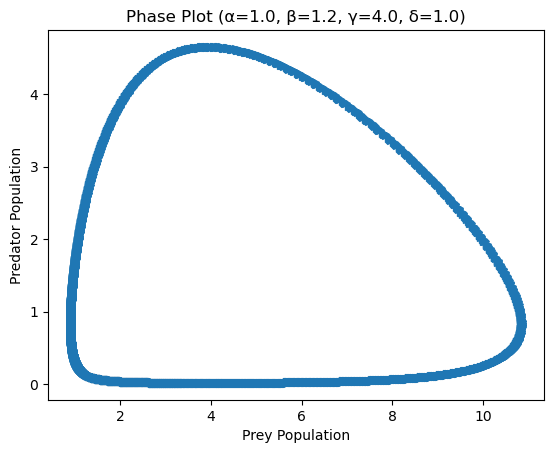

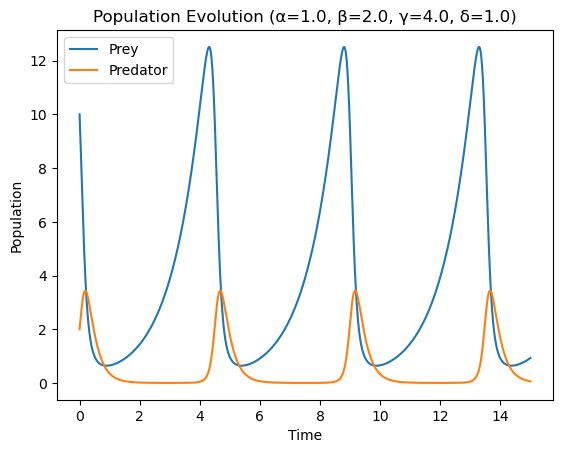

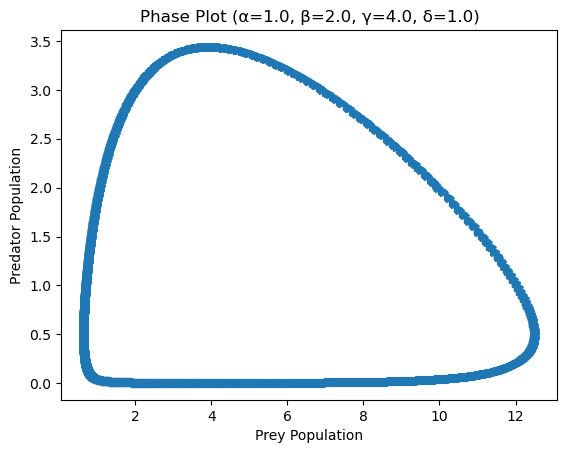

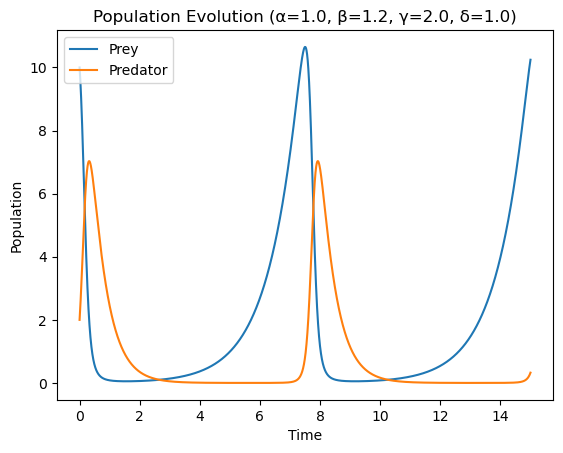

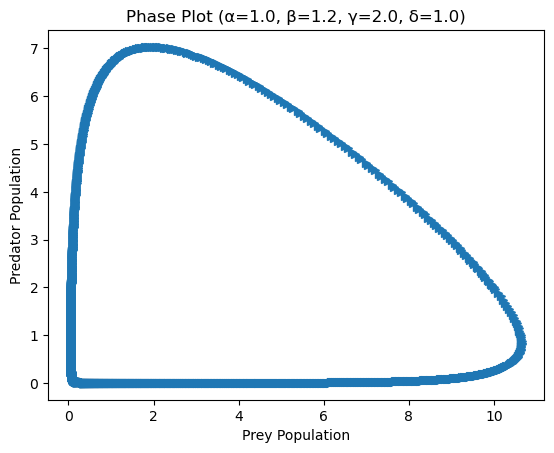

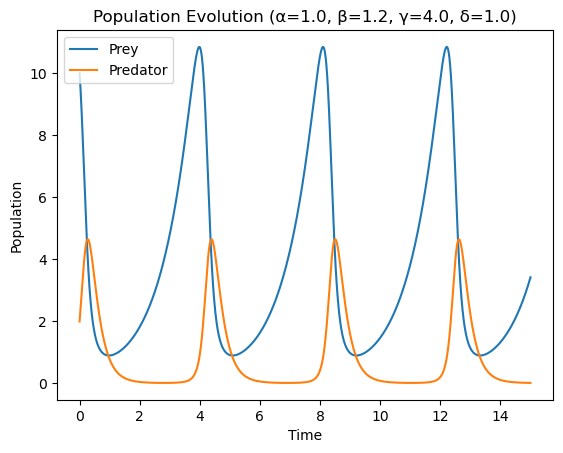

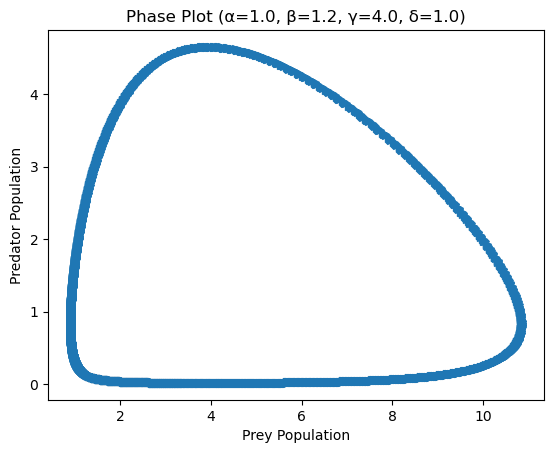

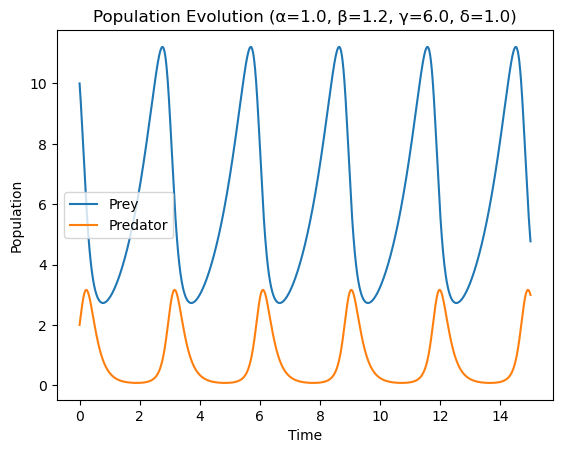

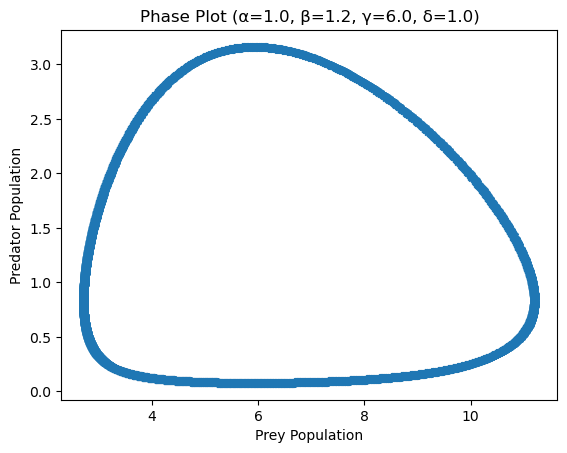

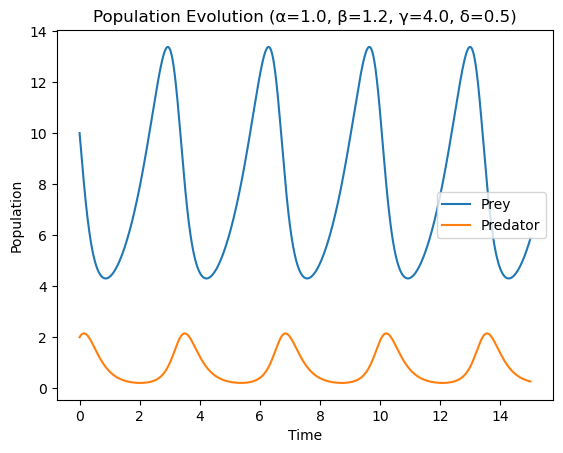

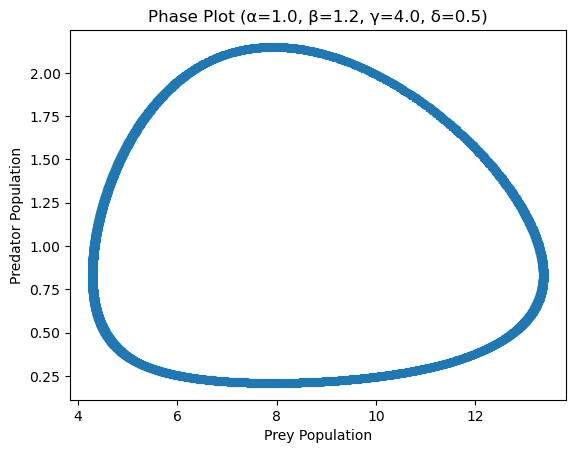

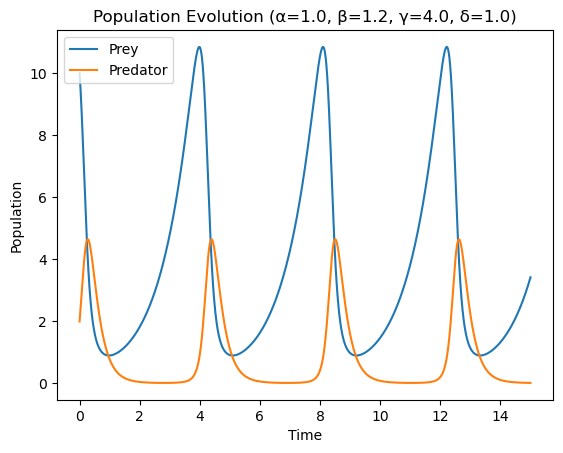

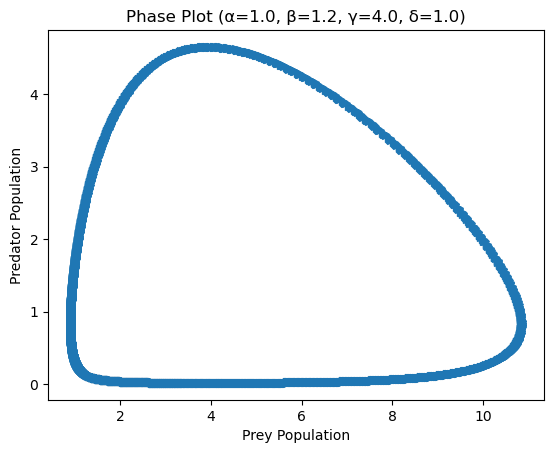

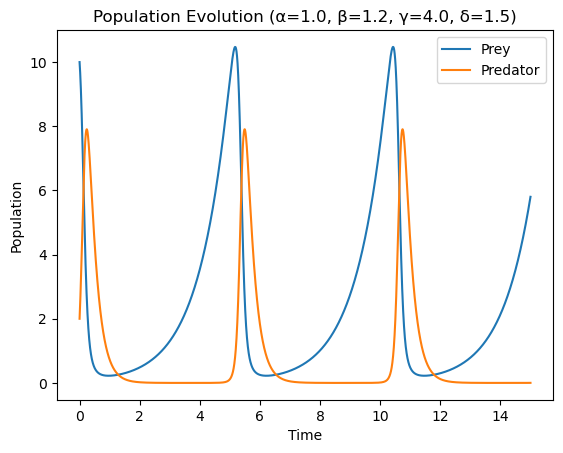

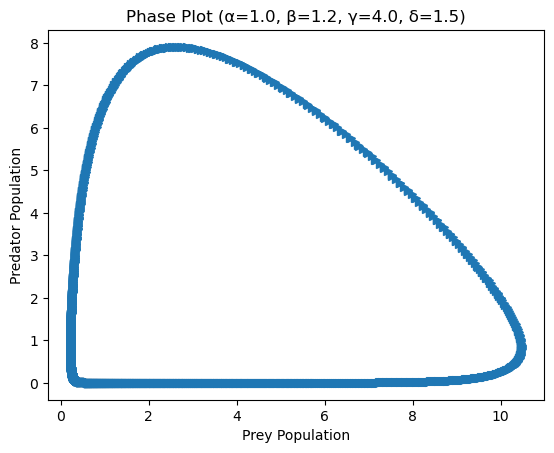

In [57]:
# Define the Lotka-Volterra system
def f(u, alpha, beta, gamma, delta):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# RK4 function
def RK4(u, f, dt, alpha, beta, gamma, delta):
    k1 = f(u, alpha, beta, gamma, delta)
    k2 = f(u + dt/2 * k1, alpha, beta, gamma, delta)
    k3 = f(u + dt/2 * k2, alpha, beta, gamma, delta)
    k4 = f(u + dt * k3, alpha, beta, gamma, delta)
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters and initial conditions
T = 15.0
dt = 0.001
N = int(T/dt) + 1
x0, y0 = 10, 2
time = np.linspace(0, T, N)

# Function to plot results
def plot_results(alpha, beta, gamma, delta):
    u = np.zeros((N, 2))
    u[0] = np.array([x0, y0])
    
    for n in range(N-1):
        u[n+1] = RK4(u[n], f, dt, alpha, beta, gamma, delta)
    
    x, y = u[:, 0], u[:, 1]
    
    # Time evolution
  
    plt.plot(time, x, label="Prey")
    plt.plot(time, y, label="Predator")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title(f"Population Evolution (α={alpha}, β={beta}, γ={gamma}, δ={delta})")
    plt.legend()
    plt.show()
    
    # Phase plot
   
    plt.plot(x, y, '-->', markevery=5)
    plt.xlabel("Prey Population")
    plt.ylabel("Predator Population")
    plt.title(f"Phase Plot (α={alpha}, β={beta}, γ={gamma}, δ={delta})")
    
    plt.show()

# Experiment by varying each parameter
alphas = [0.5, 1.0, 1.5]
betas = [0.5, 1.2, 2.0]
gammas = [2.0, 4.0, 6.0]
deltas = [0.5, 1.0, 1.5]

# Example: Vary alpha
for alpha in alphas:
    plot_results(alpha, beta=1.2, gamma=4.0, delta=1.0)

# Example: Vary beta
for beta in betas:
    plot_results(alpha=1.0, beta=beta, gamma=4.0, delta=1.0)

# Example: Vary gamma
for gamma in gammas:
    plot_results(alpha=1.0, beta=1.2, gamma=gamma, delta=1.0)

# Example: Vary delta
for delta in deltas:
    plot_results(alpha=1.0, beta=1.2, gamma=4.0, delta=delta)

Predator Self-Limitation: Because of intraspecific competition, adding ay 2 stabilizes or reduces predator populations. Less severe oscillations and a reduced predator population might arise from this.
Zombie Apocalypse: As the rate of human-to-zombie conversion (𝛽) rises, the human population will perish more quickly.
After early epidemics, humans may recover if the zombie death rate (γ) is higher.

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

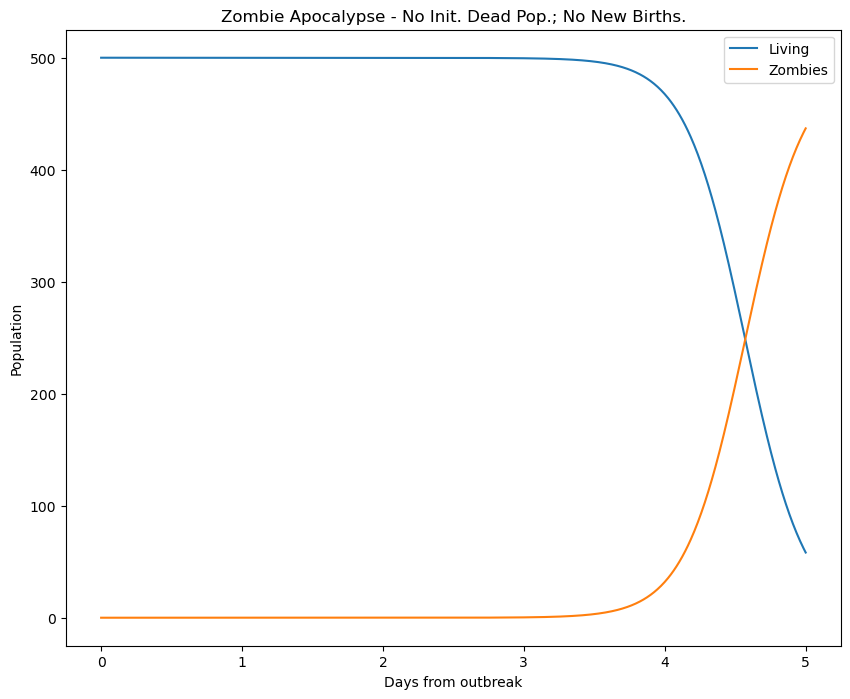

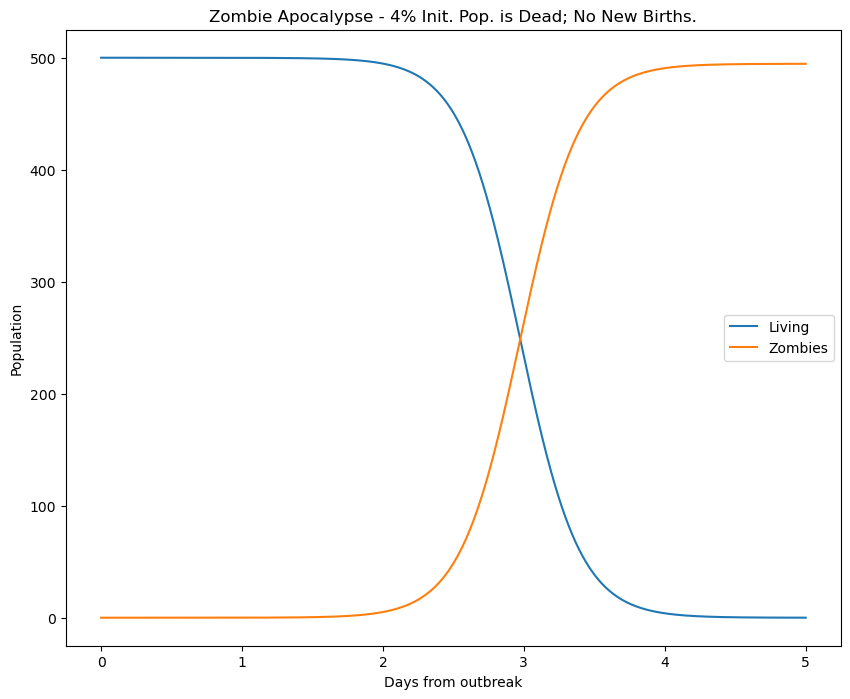

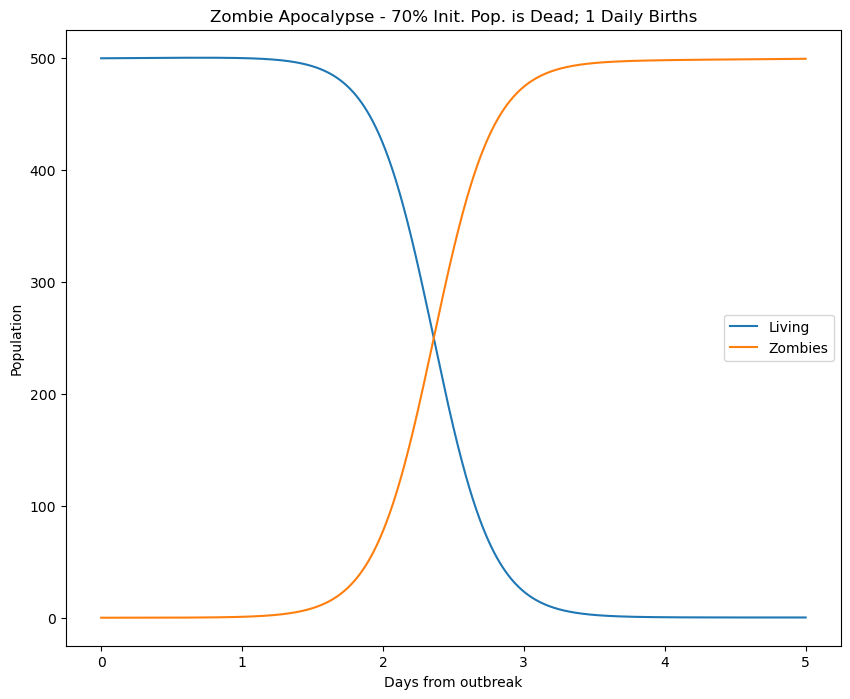

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Add this line


# zombie apocalypse modeling changing the %dead and the number of births
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)         # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# change the initial conditions (different from the example, I increased the dead percent)
R0 = 0.04*S0   # 4% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 4% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions (different from the example, I reduced the births and Increased the dead percent)
R0 = 0.70*S0   # 70% of initial pop is dead
P  = 1.        # 1 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 70% Init. Pop. is Dead; 1 Daily Births')
plt.legend(loc=0)